In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the dataset
df = pd.read_csv('nyc-parking-violations-2020_.csv')

# Display the first few rows of the dataset as it helps to check our data
df.head()


C:\Users\User\AppData\Local\Temp\ipykernel_2536\2925516501.py:6: DtypeWarning: Columns (18,29,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('nyc-parking-violations-2020_.csv')


,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1477633194,J58JKX,NJ,PAS,05/08/1972 12:00:00 AM,16,SDN,HONDA,P,8730,...,BK,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
1,1449715424,KRE6058,PA,PAS,08/29/1977 12:00:00 AM,98,SUBN,ME/BE,P,86530,...,BLK,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
2,1455779155,444326R,NJ,PAS,10/03/1988 12:00:00 AM,20,SDN,LEXUS,P,27030,...,BLACK,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
3,1458800908,F728330,OH,PAS,01/03/1990 12:00:00 AM,21,SDN,CHEVR,P,33030,...,NaN,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
4,1466038676,FMY9090,NY,PAS,02/14/1990 12:00:00 AM,21,SUBN,JEEP,S,45130,...,GREY,0.0,2015,-,0,NaN,NaN,NaN,NaN,NaN


In [14]:
# let's check the number of rows and columns that we have in our dataset

df.shape

(12495734, 32)

In [5]:
# Here we need to check the datatypes of columns

df.dtypes

Summons Number                         int64
Plate ID                              object
Registration State                    object
Plate Type                            object
Issue Date                            object
Violation Code                         int64
Vehicle Body Type                     object
Vehicle Make                          object
Issuing Agency                        object
Street Code1                           int64
Street Code2                           int64
Street Code3                           int64
Vehicle Expiration Date                int64
Violation Location                   float64
Violation Precinct                     int64
Issuer Precinct                        int64
Issuer Code                            int64
Issuer Command                        object
Issuer Squad                          object
Violation Time                        object
Time First Observed                   object
Violation County                      object
Violation 

In [6]:
# Now let's check the missing values in our columns

df.isnull().sum()

Summons Number                              0
Plate ID                                  202
Registration State                          0
Plate Type                                  0
Issue Date                                  0
Violation Code                              0
Vehicle Body Type                       45960
Vehicle Make                            62420
Issuing Agency                              0
Street Code1                                0
Street Code2                                0
Street Code3                                0
Vehicle Expiration Date                     0
Violation Location                    4538543
Violation Precinct                          0
Issuer Precinct                             0
Issuer Code                                 0
Issuer Command                        4453102
Issuer Squad                          4453592
Violation Time                            278
Time First Observed                  11951587
Violation County                  

In [7]:
# Now let's drop the columns with missing values as we know that dropping columns may result losing of information. we just need to drop 50% missing values or more, this will help us to remove columns that we don't need but also to keep some information with less missing values of 50%

df = df.dropna(thresh=len(df)*0.5, axis=1)

df

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,House Number,Street Name,Date First Observed,Law Section,Sub Division,Days Parking In Effect,Vehicle Color,Vehicle Year,Feet From Curb,Violation Post Code
0,1477633194,J58JKX,NJ,PAS,05/08/1972 12:00:00 AM,16,SDN,HONDA,P,8730,...,270,43 ST,0,408,E2,YYYYYBB,BK,0,0,NaN
1,1449715424,KRE6058,PA,PAS,08/29/1977 12:00:00 AM,98,SUBN,ME/BE,P,86530,...,1953,UNION ST,0,408,F1,BBBBBBB,BLK,0,0,NaN
2,1455779155,444326R,NJ,PAS,10/03/1988 12:00:00 AM,20,SDN,LEXUS,P,27030,...,45,CLERMONT AVENUE,0,408,D,BBBBBBB,BLACK,0,0,NaN
3,1458800908,F728330,OH,PAS,01/03/1990 12:00:00 AM,21,SDN,CHEVR,P,33030,...,218,DIVISION AVE,0,408,C,BYBBYBB,NaN,0,0,NaN
4,1466038676,FMY9090,NY,PAS,02/14/1990 12:00:00 AM,21,SUBN,JEEP,S,45130,...,850,GRAND ST,0,408,D1,BYBBYBB,GREY,2015,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495729,1458428930,62161MM,NY,COM,01/03/2040 12:00:00 AM,19,VAN,FORD,P,68020,...,2897,3RD AVE,0,408,E9,BBBBBBB,BR,2019,0,NaN
12495730,1455266164,GYE7330,NY,PAS,04/19/2045 12:00:00 AM,20,SUBN,HONDA,X,0,...,NaN,PELHAM PARK DR,0,408,D,BBBBBBB,BLK,2015,0,NaN
12495731,1446438314,HNY4802,NY,PAS,01/17/2049 12:00:00 AM,40,P-U,FORD,P,47520,...,719,LYDIG AVE,0,408,K4,BBBBBBB,GY,2005,0,NaN
12495732,1454469730,T687081C,NY,PAS,12/19/2063 12:00:00 AM,19,SDN,TOYOT,P,37470,...,1428,E 68 STREET,0,408,F7,BBBBBBB,BLK,2015,0,NaN


In [8]:
# let's do some statistical summary

df.describe()

,Summons Number,Violation Code,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Date First Observed,Law Section,Vehicle Year,Feet From Curb
count,1.249573e+07,1.249573e+07,1.249573e+07,1.249573e+07,1.249573e+07,1.249573e+07,7.957191e+06,1.249573e+07,1.249573e+07,1.249573e+07,1.249573e+07,1.249573e+07,1.249573e+07,1.249573e+07
mean,6.825854e+09,3.445436e+01,1.964788e+04,1.670525e+04,1.660956e+04,2.100915e+07,5.557393e+01,3.538907e+01,4.152843e+01,2.574112e+05,2.010245e+05,6.795635e+02,1.649931e+03,8.923549e-02
std,2.370265e+09,1.762760e+01,2.238187e+04,2.113449e+04,2.127841e+04,2.714227e+07,3.938519e+01,4.125666e+01,7.203990e+01,2.218318e+05,2.004770e+06,3.652423e+02,7.740199e+02,7.074554e-01
min,1.030414e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.678581e+09,2.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.080000e+02,2.004000e+03,0.000000e+00
50%,8.680646e+09,3.600000e+01,1.241000e+04,1.035000e+04,1.001000e+04,2.020023e+07,4.900000e+01,1.800000e+01,1.400000e+01,3.570940e+05,0.000000e+00,4.080000e+02,2.013000e+03,0.000000e+00
75%,8.760762e+09,3.800000e+01,3.423000e+04,2.709700e+04,2.739000e+04,2.021042e+07,9.000000e+01,6.800000e+01,6.900000e+01,3.664440e+05,0.000000e+00,1.180000e+03,2.017000e+03,0.000000e+00
max,8.849000e+09,9.900000e+01,9.826000e+04,9.831000e+04,9.828000e+04,8.888889e+07,9.460000e+02,9.460000e+02,9.960000e+02,9.999790e+05,2.030033e+07,1.180000e+03,2.069000e+03,1.600000e+01


In [10]:
# let's see all the columns 
pd.set_option('display.max_columns', None)

In [11]:
df

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Date First Observed,Law Section,Sub Division,Days Parking In Effect,Vehicle Color,Vehicle Year,Feet From Curb,Violation Post Code
0,1477633194,J58JKX,NJ,PAS,05/08/1972 12:00:00 AM,16,SDN,HONDA,P,8730,5130,5280,0,72.0,72,504,342924,T504,0000,0523P,K,F,270,43 ST,0,408,E2,YYYYYBB,BK,0,0,NaN
1,1449715424,KRE6058,PA,PAS,08/29/1977 12:00:00 AM,98,SUBN,ME/BE,P,86530,71800,73110,0,77.0,77,77,961115,0077,0000,0428P,K,F,1953,UNION ST,0,408,F1,BBBBBBB,BLK,0,0,NaN
2,1455779155,444326R,NJ,PAS,10/03/1988 12:00:00 AM,20,SDN,LEXUS,P,27030,41330,69230,0,88.0,88,730,535422,T730,0000,0625A,K,O,45,CLERMONT AVENUE,0,408,D,BBBBBBB,BLACK,0,0,NaN
3,1458800908,F728330,OH,PAS,01/03/1990 12:00:00 AM,21,SDN,CHEVR,P,33030,93630,58730,0,90.0,90,301,355074,T301,0000,1106A,K,F,218,DIVISION AVE,0,408,C,BYBBYBB,NaN,0,0,NaN
4,1466038676,FMY9090,NY,PAS,02/14/1990 12:00:00 AM,21,SUBN,JEEP,S,45130,23930,68130,20210915,90.0,90,0,668676,KNBO,0000,1253A,K,F,850,GRAND ST,0,408,D1,BYBBYBB,GREY,2015,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495729,1458428930,62161MM,NY,COM,01/03/2040 12:00:00 AM,19,VAN,FORD,P,68020,26160,26190,0,40.0,40,0,361339,BXTE,0000,1111A,BX,F,2897,3RD AVE,0,408,E9,BBBBBBB,BR,2019,0,NaN
12495730,1455266164,GYE7330,NY,PAS,04/19/2045 12:00:00 AM,20,SUBN,HONDA,X,0,0,0,20210519,45.0,45,2,160283,0002,0000,0444P,BX,F,NaN,PELHAM PARK DR,0,408,D,BBBBBBB,BLK,2015,0,NaN
12495731,1446438314,HNY4802,NY,PAS,01/17/2049 12:00:00 AM,40,P-U,FORD,P,47520,77150,22920,20210327,49.0,49,49,949429,0049,0000,0210A,BX,F,719,LYDIG AVE,0,408,K4,BBBBBBB,GY,2005,0,NaN
12495732,1454469730,T687081C,NY,PAS,12/19/2063 12:00:00 AM,19,SDN,TOYOT,P,37470,14280,14580,20200831,63.0,63,63,943157,0063,0000,0225P,K,F,1428,E 68 STREET,0,408,F7,BBBBBBB,BLK,2015,0,NaN


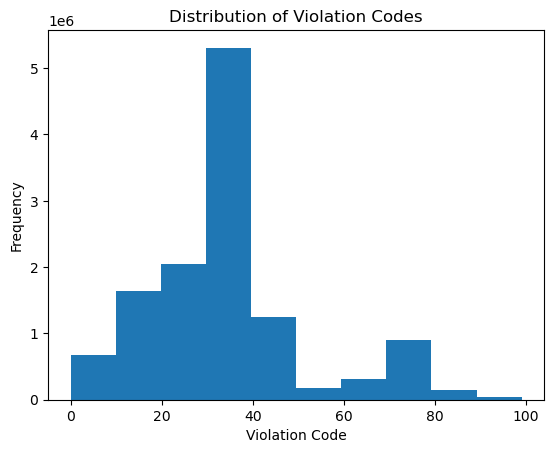

In [16]:
# Now let's do some visualisations starting to Histograms to show the distribution of numerical variables:

plt.hist(df['Violation Code'])
plt.title('Distribution of Violation Codes')
plt.xlabel('Violation Code')
plt.ylabel('Frequency')
plt.show()


Note on the histogram violation code then this is showing us that from the violation code 10 to violation code 50 were highly violated than others.


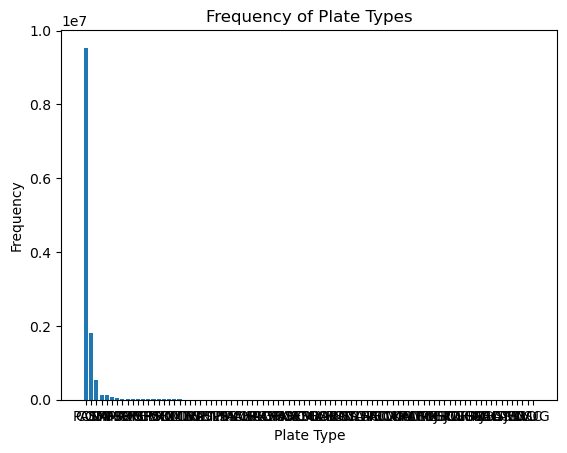

In [2]:
# then after let's do visualisations of Bar charts to show the frequency of categorical variables:

plt.bar(df['Plate Type'].value_counts().index, df['Plate Type'].value_counts().values)
plt.title('Frequency of Plate Types')
plt.xlabel('Plate Type')
plt.ylabel('Frequency')
plt.show()


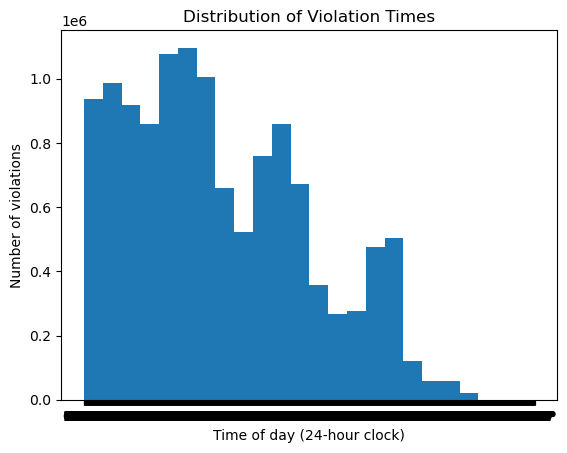

In [7]:

# Now let's Create a histogram plot of violation times

# Convert Violation Time to string type
df['Violation Time'] = df['Violation Time'].astype(str)

plt.hist(df['Violation Time'], bins=24)
plt.xlabel('Time of day (24-hour clock)')
plt.ylabel('Number of violations')
plt.title('Distribution of Violation Times')
plt.show()


Note on interpretation of histogram violation time:
    
    
    The histogram of violation time shows the distribution of violation times throughout the day. The x-axis represents the time of day, with the 24-hour clock format, and the y-axis represents the number of violations.

From the histogram, we can see that there are more violations during the day, especially during the late morning and early afternoon. This may be due to people parking in spaces for longer than the allowed time or parking in spaces that are restricted during certain hours. We can also see a smaller peak in violations during the evening, which may be due to people parking illegally in residential areas.
